In [7]:
%matplotlib inline
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import svm,decomposition
import matplotlib.pyplot as plt
import numpy as np 

iris_dataset = datasets.load_iris()
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data,iris_dataset.target, random_state=12)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


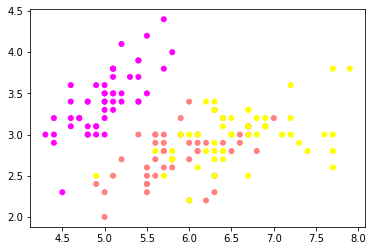

In [16]:
# plotting scatters
plt.scatter(iris_dataset.data[:, 0], iris_dataset.data[:, 1], c=iris_dataset.target, s=25,cmap='spring');
plt.show()

In [17]:
pca = decomposition.PCA(n_components=3, whiten=True, random_state=12)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=12,
    svd_solver='auto', tol=0.0, whiten=True)

In [18]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

clf = svm.SVC(C=3., gamma=0.005, random_state=12)
clf.fit(X_train_pca, y_train)

(112, 3)


SVC(C=3.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.89        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.89      0.89      0.89        38



In [20]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=3, whiten=True)), ('svm', svm.LinearSVC(C=3.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))

[[14  0  0]
 [ 1 11  0]
 [ 0  1 11]]
